In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
import json


In [41]:
#1. Data Understanding & Preprocessing
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [42]:
# Check missing values
print("Total Missing Values:", df.isnull().sum().sum())

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Define features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Total Missing Values: 0


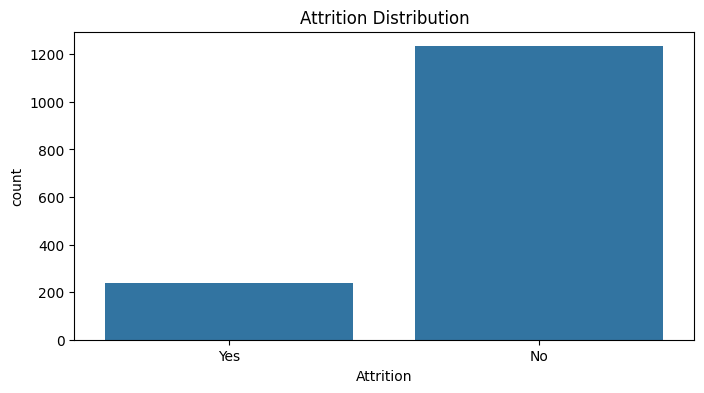

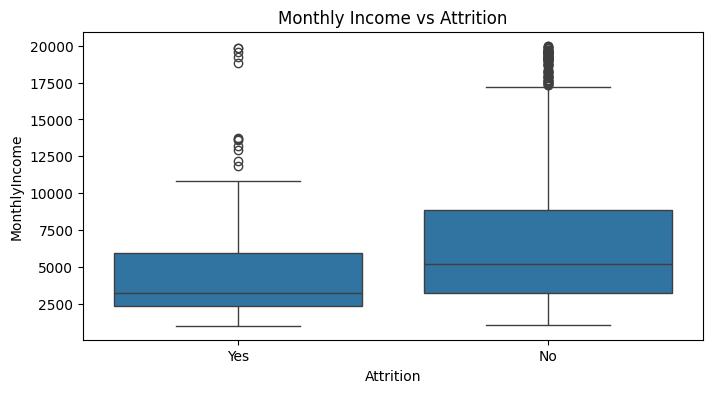

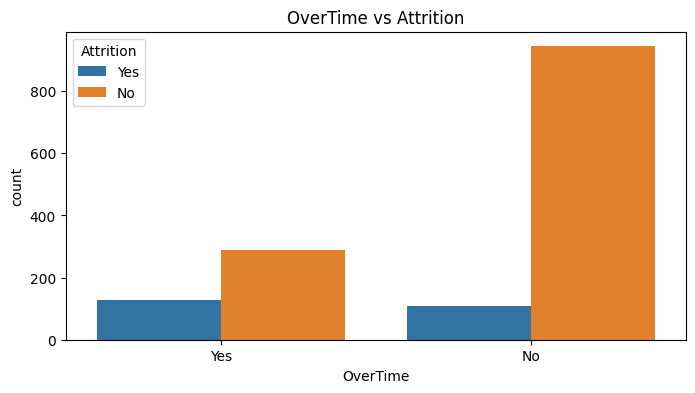

In [43]:
# 2. Visualizations

# Attrition distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

# Monthly Income vs Attrition
plt.figure(figsize=(8, 4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

# OverTime vs Attrition
plt.figure(figsize=(8, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('OverTime vs Attrition')
plt.show()


In [44]:
# 3. Model Building
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Then split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)
# Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight=None,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [45]:
# Predictions
y_pred = rf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9271255060728745
Precision: 0.9451476793248945
Recall: 0.9068825910931174
F1 Score: 0.9256198347107438


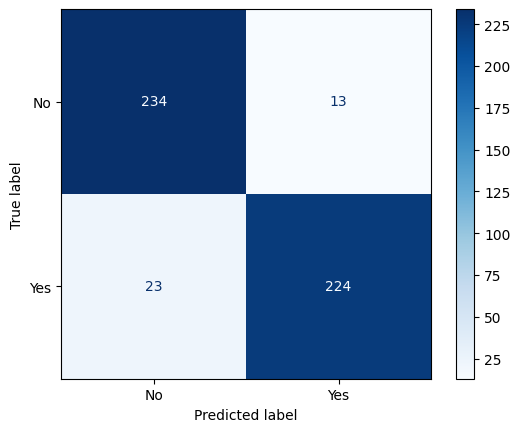

In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Attrition'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

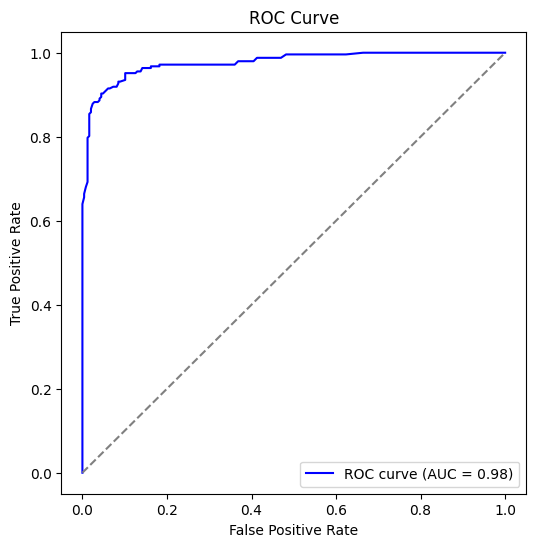

In [47]:
# ROC Curve
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
# Save the trained model
joblib.dump(rf, "rf_attrition_model.joblib")


['rf_attrition_model.joblib']